In [6]:
import sqlite3

# Create database and connect
conn = sqlite3.connect('sales2_data.db')
cursor = conn.cursor()

# Create sales table
cursor.execute('''
CREATE TABLE sales (
    id INTEGER PRIMARY KEY,
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')

# Insert sample data
sample_data = [
    ('Pen', 10, 5.0),
    ('Pencil', 15, 2.0),
    ('Notebook', 5, 20.0),
    ('Pen', 7, 5.0),
    ('Pencil', 10, 2.0),
    ('Notebook', 3, 20.0)
]

cursor.executemany('INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)', sample_data)
conn.commit()
conn.close()

    product  total_qty  revenue
0  Notebook          8    160.0
1       Pen         17     85.0
2    Pencil         25     50.0


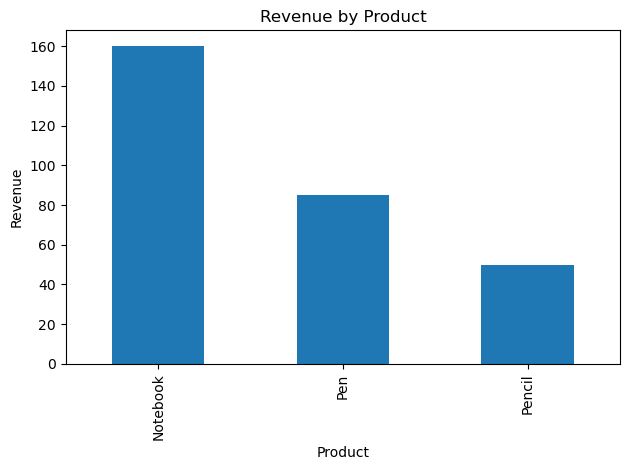

In [7]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('sales_data.db')

# SQL query to get total quantity and revenue per product
query = '''
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
'''

# Load query result into pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Print the result
print(df)

# Plot bar chart of revenue
df.plot(kind='bar', x='product', y='revenue', title='Revenue by Product', legend=False)
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()